### Decision Tree for Classification

#### Gini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.DataFrame({
    'age': [23, 25, 27, 29, 29],
    'likes english': [0, 1, 1, 0, 0],
    'likes AI': [0, 1, 0, 1, 0],
    'raise salary': [0, 0, 1, 1, 0]
})

data

,age,likes english,likes AI,raise salary
0,23,0,0,0
1,25,1,1,0
2,27,1,0,1
3,29,0,1,1
4,29,0,0,0


In [3]:
X = data[['age', 'likes english', 'likes AI']].values
y = data[['raise salary']].values
X, y

(array([[23,  0,  0],
        [25,  1,  1],
        [27,  1,  0],
        [29,  0,  1],
        [29,  0,  0]], dtype=int64),
 array([[0],
        [0],
        [1],
        [1],
        [0]], dtype=int64))

In [4]:
data_classifier_gini = DecisionTreeClassifier(criterion='gini')
data_classifier_gini.fit(X, y)

DecisionTreeClassifier()

[Text(0.4, 0.875, 'age <= 26.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'likes english <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'likes AI <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

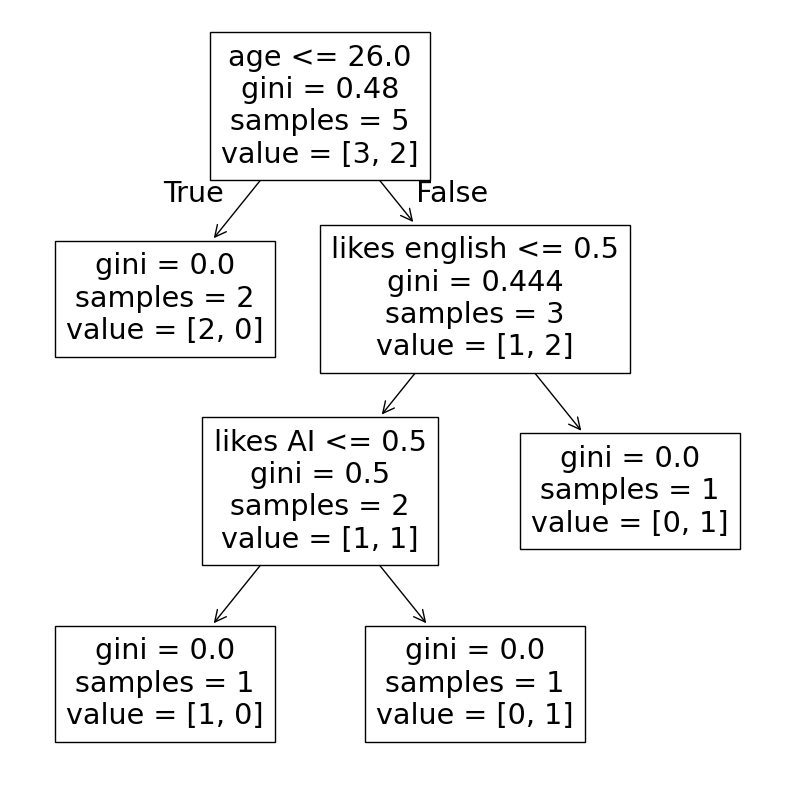

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(data_classifier_gini, feature_names=['age', 'likes english', 'likes AI'], ax=ax)

#### Information Gain

In [6]:
data_classifier_IG = DecisionTreeClassifier(criterion='entropy')
data_classifier_IG.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4, 0.875, 'age <= 26.0\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'likes AI <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'likes english <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

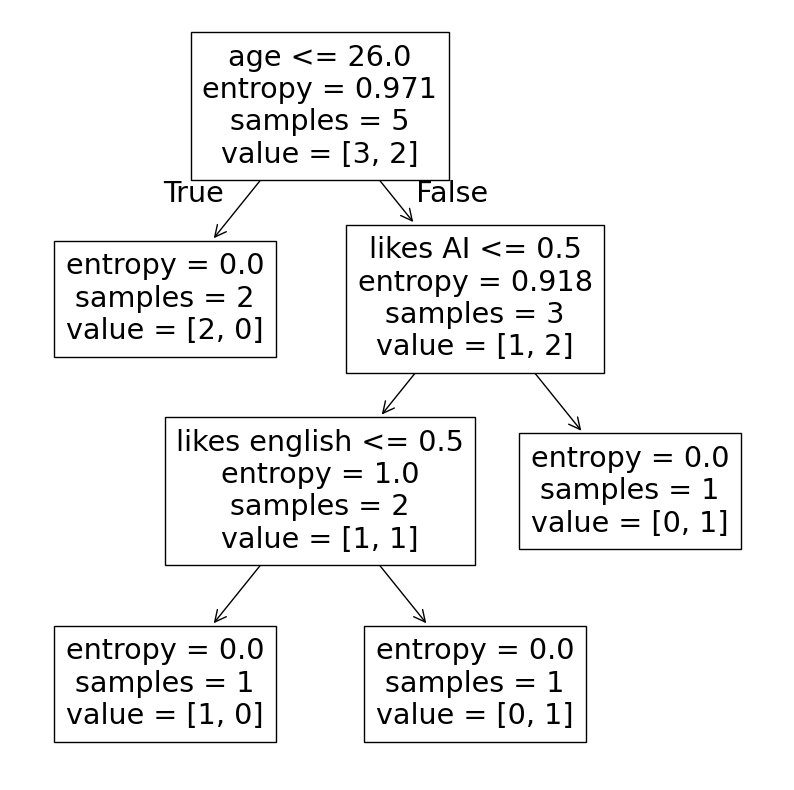

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(data_classifier_IG, feature_names=['age', 'likes english', 'likes AI'], ax=ax)

#### Iris dataset

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

iris_X, iris_y = datasets.load_iris(return_X_y=True)

# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y,
    test_size=0.2,
    random_state=42
)

# Define model 
dt_classifier = DecisionTreeClassifier()

# train
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

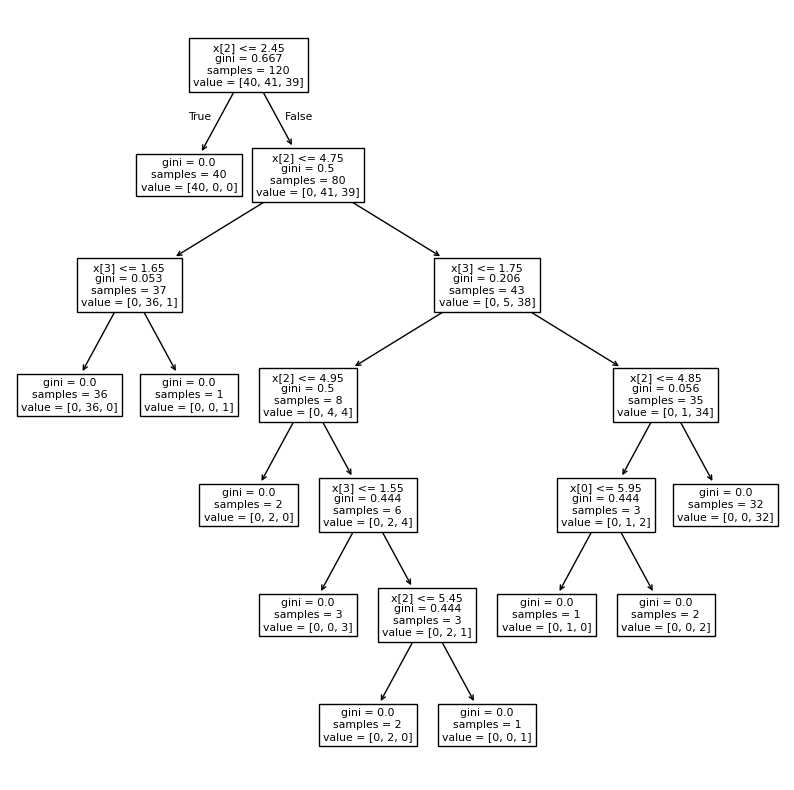

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(classifier, ax=ax)
plt.show()

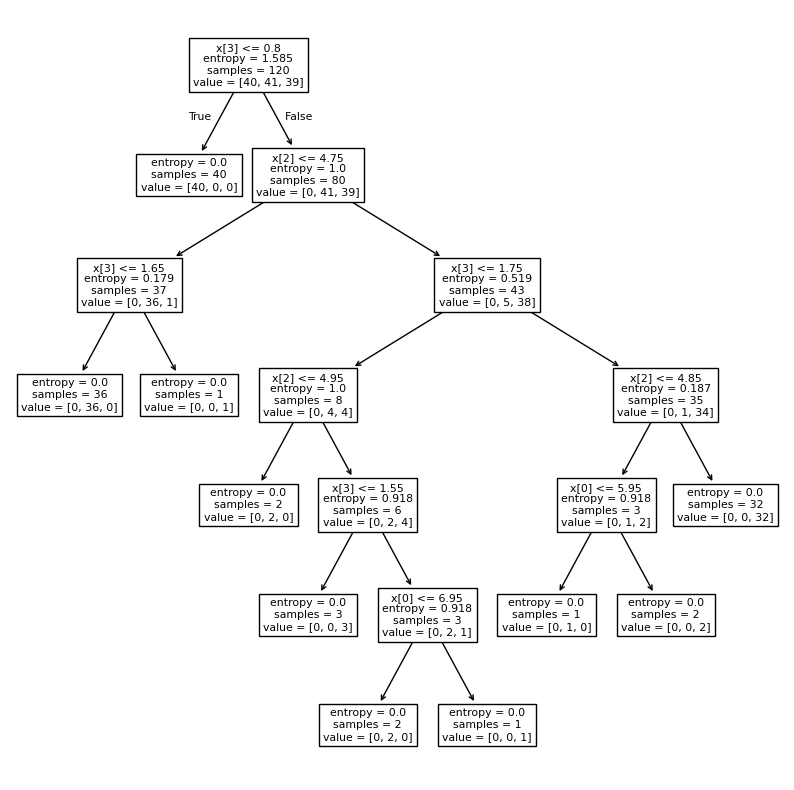

In [10]:
classifier = tree.DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(classifier, ax=ax)
plt.show()

### Decision Tree for Regression

#### Sum of Squared Error

$\text{SSE}(D) = \text{SSE}(D_1) + \text{SSE}(D_2)$

$\text{SSE}(D_i) = \sum_{1}^{n_i} (x_j - \overline{x}_i)^2$

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [12]:
data = pd.DataFrame({
    'age': [23, 25, 27, 29, 29],
    'likes english': [0, 1, 1, 0, 0],
    'likes AI': [0, 1, 0, 1, 0],
    'salary': [200, 400, 300, 500, 400]
})
data

,age,likes english,likes AI,salary
0,23,0,0,200
1,25,1,1,400
2,27,1,0,300
3,29,0,1,500
4,29,0,0,400


In [13]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X, y

(array([[23,  0,  0],
        [25,  1,  1],
        [27,  1,  0],
        [29,  0,  1],
        [29,  0,  0]], dtype=int64),
 array([200, 400, 300, 500, 400], dtype=int64))

In [14]:
data_regression = DecisionTreeRegressor()
data_regression.fit(X, y)

DecisionTreeRegressor()

[Text(0.375, 0.875, 'age <= 24.0\nsquared_error = 10400.0\nsamples = 5\nvalue = 360.0'),
 Text(0.25, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 200.0'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'likes english <= 0.5\nsquared_error = 5000.0\nsamples = 4\nvalue = 400.0'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'likes AI <= 0.5\nsquared_error = 2500.0\nsamples = 2\nvalue = 450.0'),
 Text(0.125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 400.0'),
 Text(0.375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 500.0'),
 Text(0.75, 0.375, 'age <= 26.0\nsquared_error = 2500.0\nsamples = 2\nvalue = 350.0'),
 Text(0.625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 400.0'),
 Text(0.875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 300.0')]

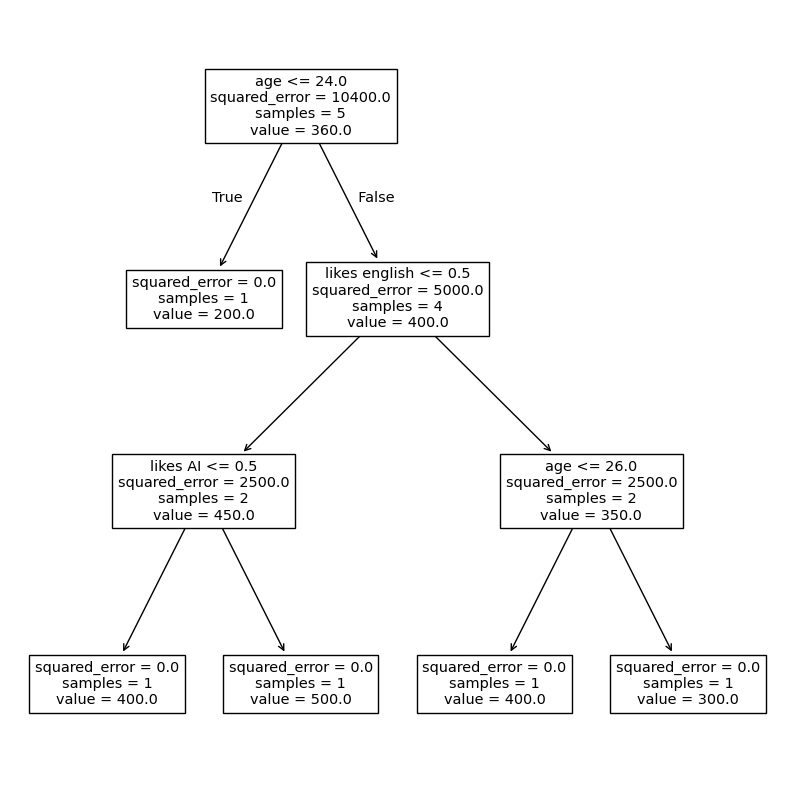

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(data_regression, feature_names=data.keys()[:-1], ax=ax)

#### CPU Machine Dataset

In [16]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load dataset
machine_cpu = fetch_openml(name='machine_cpu')
machine_data = machine_cpu.data
machine_labels = machine_cpu.target

# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    machine_data, machine_labels,
    test_size=0.2,
    random_state=42
)

# Define model
tree_reg = DecisionTreeRegressor()

# Train
tree_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

c:\Users\FPTSHOP\anaconda3\envs\aio2024-exercise\Lib\site-packages\sklearn\datasets\_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name machine_cpu exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=230
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=733

  warn(warning_msg)


9260.841931216932